In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
%matplotlib inline
plt.rcParams["figure.figsize"] = (18.,9.)

In [3]:
def form_discrete_values(settings, funcs, y, orders, h):
    start, end, step = settings
    #h = y[0, 1] - y[0, 0]
    #args = np.arange(start, end, step)
    #x = np.array([[func(y[t - 1, 0]) for func in funcs] for t in range(1, y.shape[0])]) Ferhulst
    x = np.array([[funcs[j](y[t - orders[j], 0]) for j in range(len(funcs))] for t in range(orders[0], y.shape[0])])
    data = np.hstack((x, y[orders[0]:]))
    return data


#class Approximator(object):
#    def __init__(data, )


class Model:
    def __init__(self, system):
        self.system = system
        self.solved = None
        self.time_points = None
        self.initial_condition = None
        self.params = None
    
    def get_values(self, step):
        data = self.solved[:, 0][::step]
        return data.reshape((data.shape[0], 1))
    
    def build(self, params, initial_condition, time_points):
        self.params = params
        self.time_points = time_points
        self.initial_condition = initial_condition
        self.solved = odeint(self.system, initial_condition, time_points, args=params)
            
    def get_data(self, index):
        if index == 0:
            return pd.DataFrame({'t': self.time_points, 'X(t)': self.solved[:, 0]})
        if index == 1:
            return pd.DataFrame({'t': self.time_points, 'Y(t)': self.solved[:, 1]})
        else:
            return pd.DataFrame({'X': self.solved[:, 0], 'Y': self.solved[:, 1]})
    
    def plot(self, name, params):
        plt.figure(0)
        plt.figure(figsize = (18,10))
        plt.xlabel('t', fontsize=15)
        plt.ylabel('X(t)', fontsize=15)
        for index in range(len(self.initial_condition) - 1):
            plt.plot(self.time_points, self.solved[:, index])
        plt.title(name + ' ' +  params, fontsize=15)
    
    
    def get_params(self, data):
        Hs = np.array([[(data[:, 0].T @ data[:, 0])]])
        h = np.array([[data[:, 0] @ data[:, 1]]]) #data[:, 1]]??? = x?
        eta = np.array([[data[:, 0].T @ data[:, 0]]])
        Hs_inv = np.linalg.inv(Hs)
        
        for i in range(1, data.shape[1] - 1):
            h = np.array([data[:, :i].T @ data[:, i]])
            print(h.shape)
            h = h.reshape((1, h.shape[0]))
            eta = np.array([[data[:, i].T @ data[:, i]]])
            Hs_1 = Hs
            Hs_2 = h
            Hs_3 = h.T
            Hs_4 = eta
            Hs = np.hstack((np.vstack((Hs_1, Hs_3)), np.vstack((Hs_2, Hs_4))))
            
            beta = eta - h.T @ Hs_inv @ h
            
            Hs_inv_1 = Hs_inv + (1 / beta) * Hs_inv @ h @ h.T @ Hs_inv
            Hs_inv_2 = -(1 / beta) * Hs_inv @ h
            Hs_inv_3 = -(1 / beta) * h.T @ Hs_inv
            Hs_inv_4 = (1 / beta)
            
            Hs_inv = np.hstack((np.vstack((Hs_inv_1, Hs_inv_3)), np.vstack((Hs_inv_2, Hs_inv_4))))
            
            gs = np.vstack((data[:, :i].T @ data[:, -1], data[:, i].T @ data[:, -1]))
            
            teta = Hs_inv @ gs
        
        return teta
    
    
    def phase_plot(self, name):
        plt.figure(1)
        plt.figure(figsize = (18,10))
        plt.xlabel('X', fontsize=15)
        plt.ylabel('Y', fontsize=15)
        plt.scatter(self.solved[0,0], self.solved[0, 1])
        plt.plot(self.solved[:,0], self.solved[:, 1])
        plt.title(name + ' ' + '(phase plot)', fontsize=15)
        #plt.plot([x*self.params[0]/self.params[1] - self.params[2]/self.params[0] for x in self.time_points])
        
        #plt.plot([y*self.params[3]/self.params[4] - self.params[5]/self.params[3] for y in self.time_points])

## Lotka-Volterra model

In [4]:
def Lotka_Volterra(z, t, a, b, g, d):
    '''@a - коэф. рождаемости жертв
    @b - убийство жертвы с коэф. b
    @g - коэф.убыли хищников
    @d - рождения от сытого хищника с коэф. d
    Для правильной модели: a = -beta, b = -alpha, g = -delta, d = - gamma'''
    dx_dt = (a * z[1] - b ) * z[0]
    dy_dt = (g - d * z[0]) * z[1]
    return dx_dt, dy_dt

In [5]:
lotka = Model(Lotka_Volterra)

<Figure size 432x288 with 0 Axes>

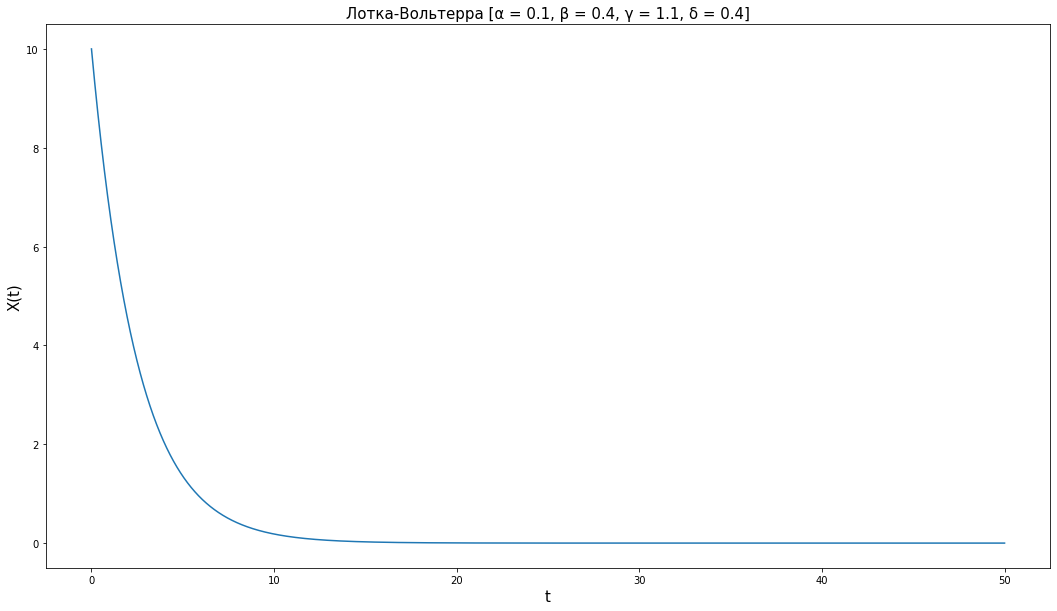

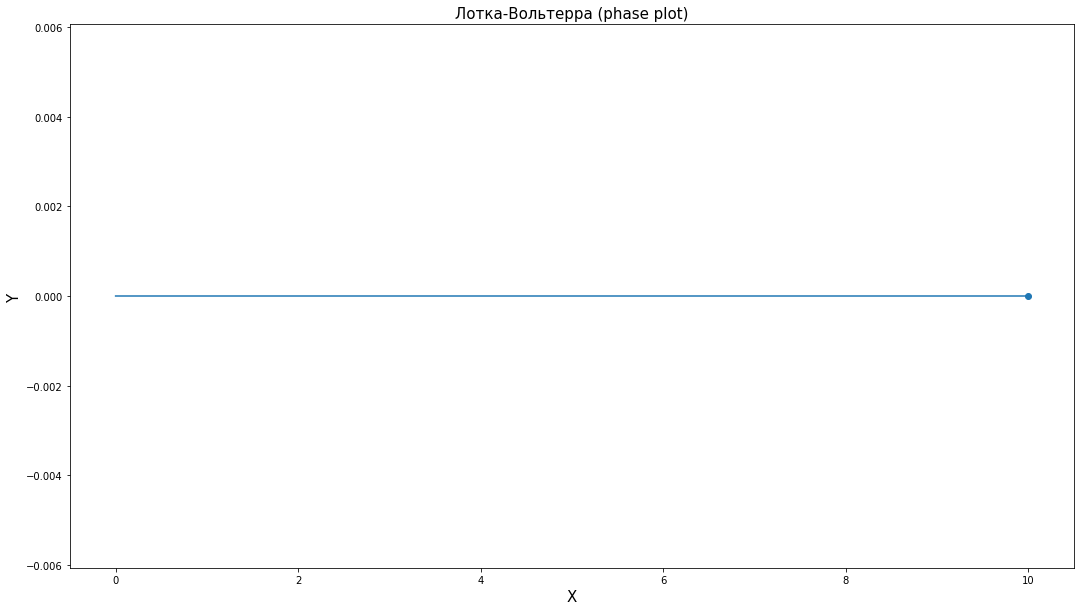

In [6]:
lotka.build((0.1, 0.4, 1.1, 0.4), (10,0), np.linspace(0, 50, 1000000))
lotka.plot('Лотка-Вольтерра', '[\u03B1 = 0.1, \u03B2 = 0.4, \u03B3 = 1.1, \u03B4 = 0.4]')
lotka.phase_plot('Лотка-Вольтерра')

#### Display values

In [7]:
#pd.set_option('display.max_rows', 999)
#For displaying X(t) and Y(t)
#pd.merge(lotka.get_data(0), lotka.get_data(1), on = 't')


<Figure size 432x288 with 0 Axes>

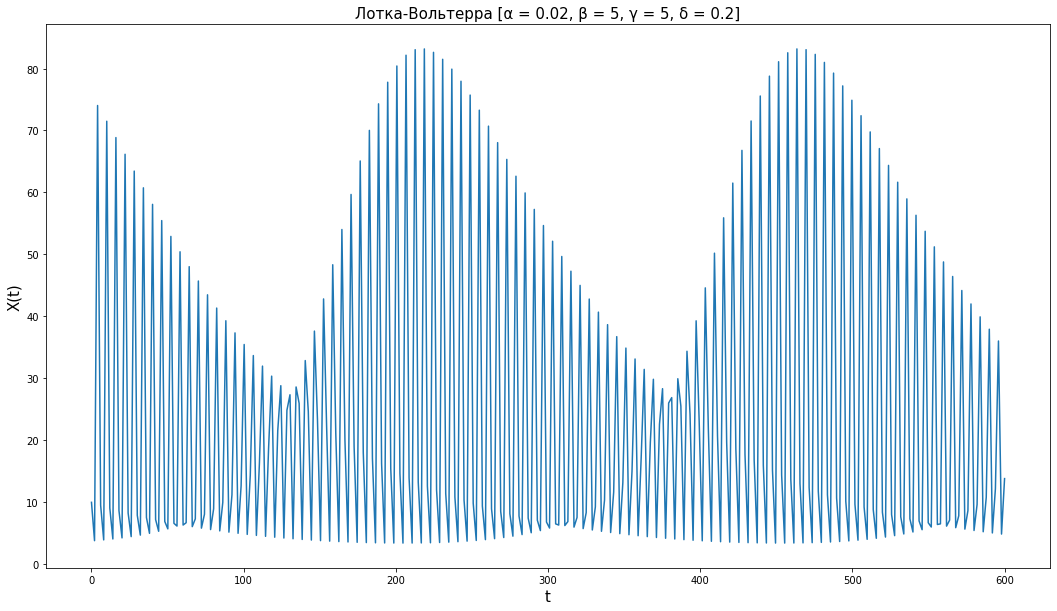

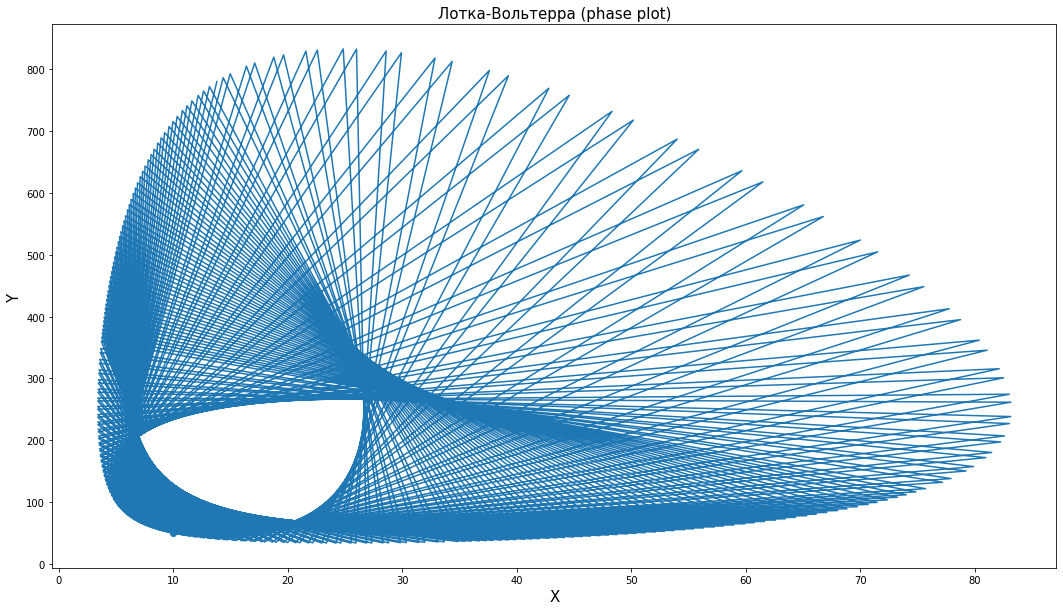

In [8]:
lotka.build((0.02, 5, 5, 0.2), (10,50), np.linspace(0, 600, 300))
lotka.plot('Лотка-Вольтерра', '[\u03B1 = 0.02, \u03B2 = 5, \u03B3 = 5, \u03B4 = 0.2]')
lotka.phase_plot('Лотка-Вольтерра')

### Display values

In [9]:
#pd.set_option('display.max_rows', 999)
#For displaying X(t) and Y(t)
#pd.merge(lotka.get_data(0), lotka.get_data(1), on = 't')

<Figure size 432x288 with 0 Axes>

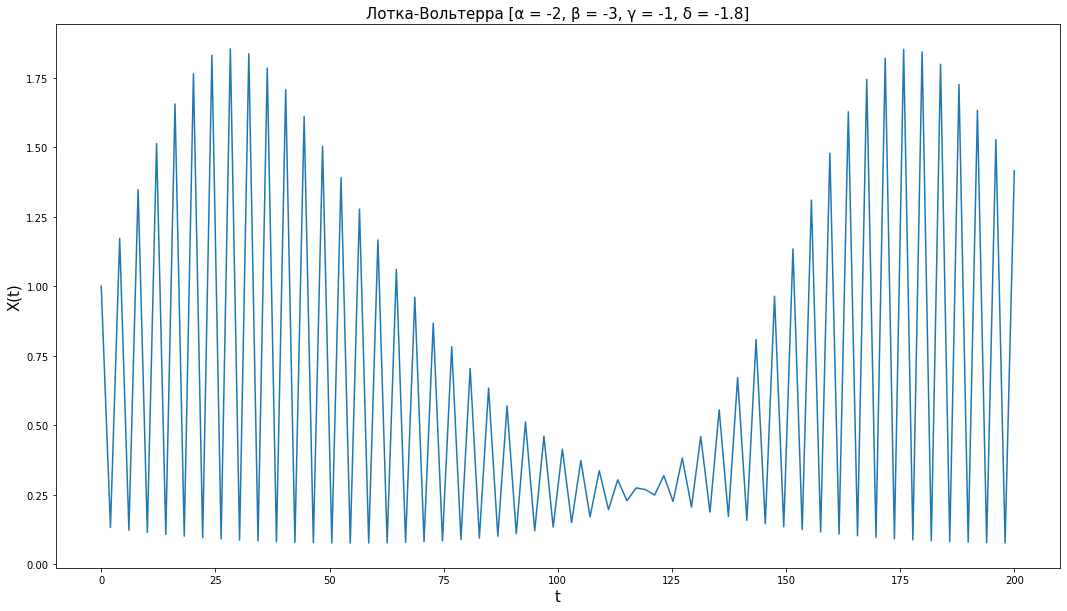

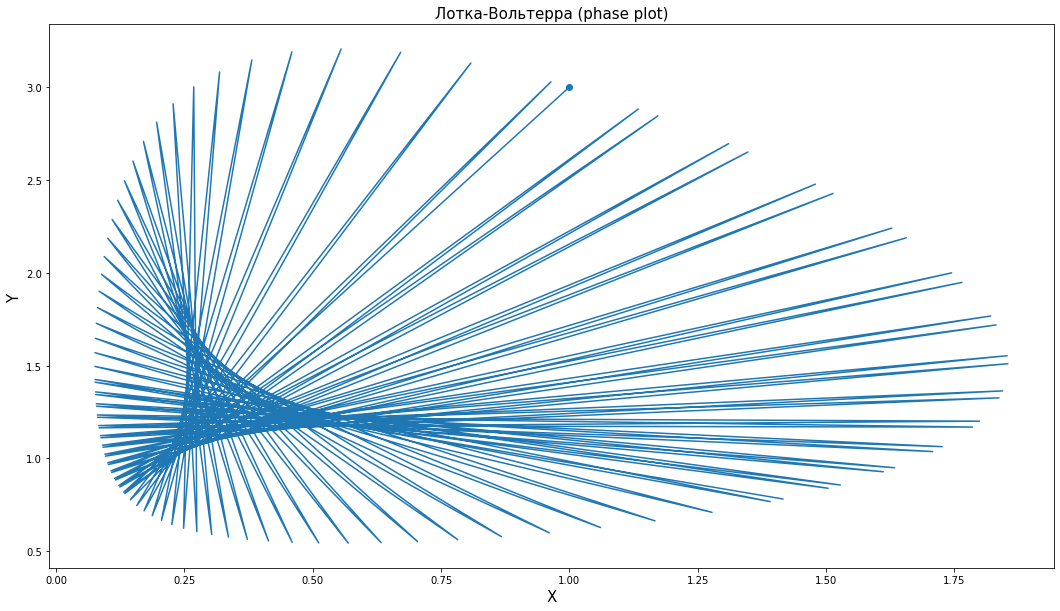

In [10]:
lotka.build((-2, -3, -1, -1.8), (1,3), np.linspace(0, 200, 100))
lotka.plot('Лотка-Вольтерра', '[\u03B1 = -2, \u03B2 = -3, \u03B3 = -1, \u03B4 = -1.8]')
lotka.phase_plot('Лотка-Вольтерра')

### Display values

In [11]:
#pd.set_option('display.max_rows', 999)
#For displaying X(t) and Y(t)
#pd.merge(lotka.get_data(0), lotka.get_data(1), on = 't')

## Van Der Pol

In [12]:
def Wonder(z, t, a, b):
    dx_dt = z[1]
    dy_dt = -z[0] + a * (1 - z[0] ** 2) * z[1]
    return dx_dt, dy_dt

In [13]:
wonder = Model(Wonder)

<Figure size 432x288 with 0 Axes>

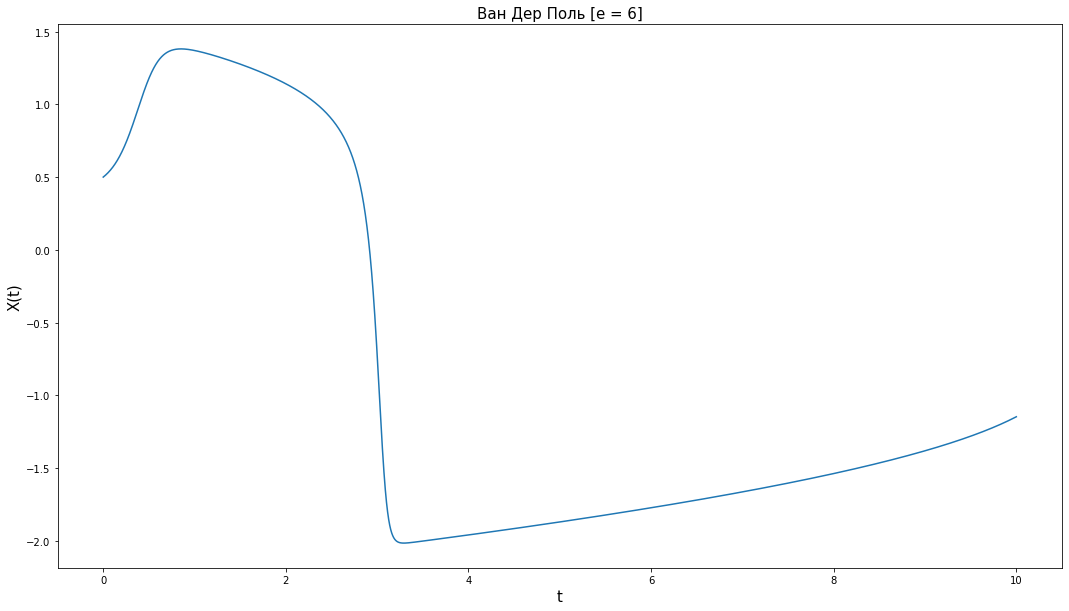

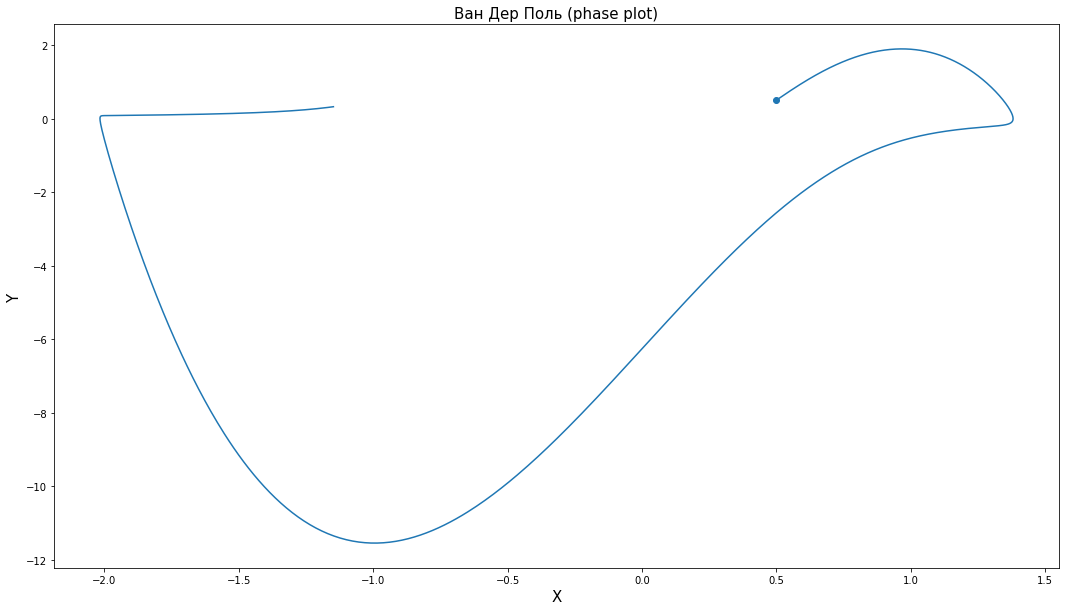

In [14]:
wonder.build( (8, 0), (0.5, 0.5), np.linspace(0, 10, 10000))
wonder.plot('Ван Дер Поль','[e = 6]')
wonder.phase_plot('Ван Дер Поль')

### Display values

In [15]:
#pd.set_option('display.max_rows', 999)
#For displaying X(t) and Y(t)
#pd.merge(wonder.get_data(0), wonder.get_data(1), on = 't')

<Figure size 432x288 with 0 Axes>

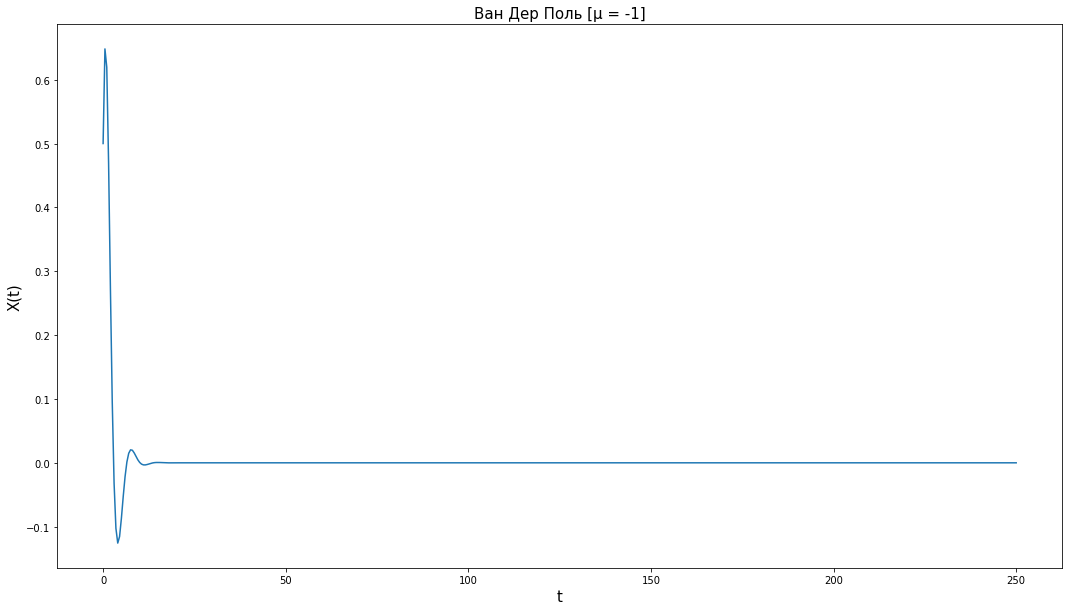

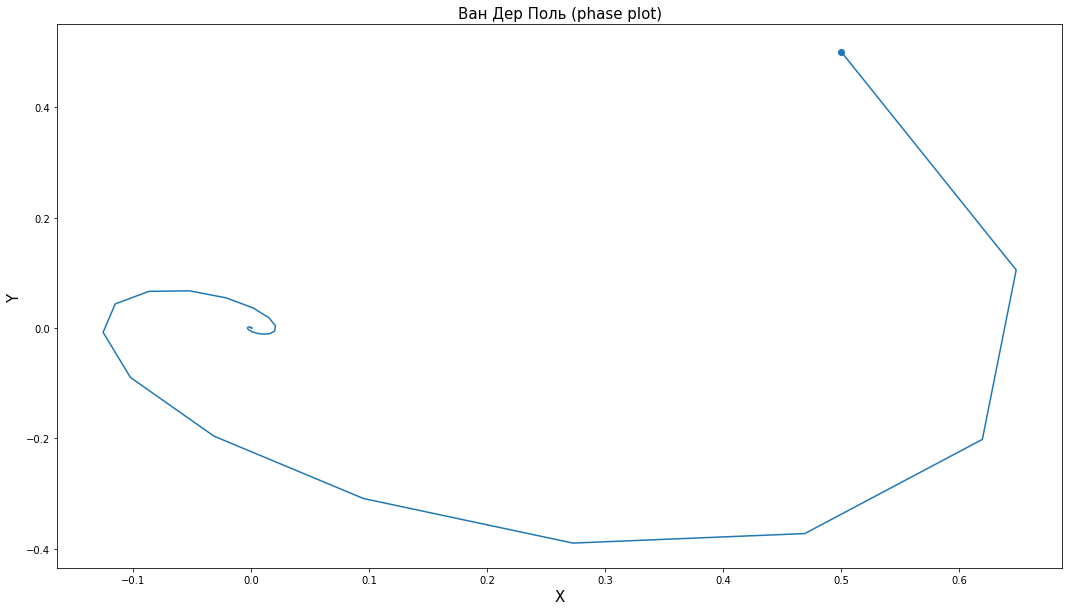

In [16]:
wonder.build( (-1, 0), (0.5,0.5), np.linspace(0, 250, 500))
wonder.plot('Ван Дер Поль','[\u03BC = -1]')
wonder.phase_plot('Ван Дер Поль')

### Display values

In [17]:
#pd.set_option('display.max_rows', 999)
#For displaying X(t) and Y(t)
#pd.merge(wonder.get_data(0), wonder.get_data(1), on = 't')

<Figure size 432x288 with 0 Axes>

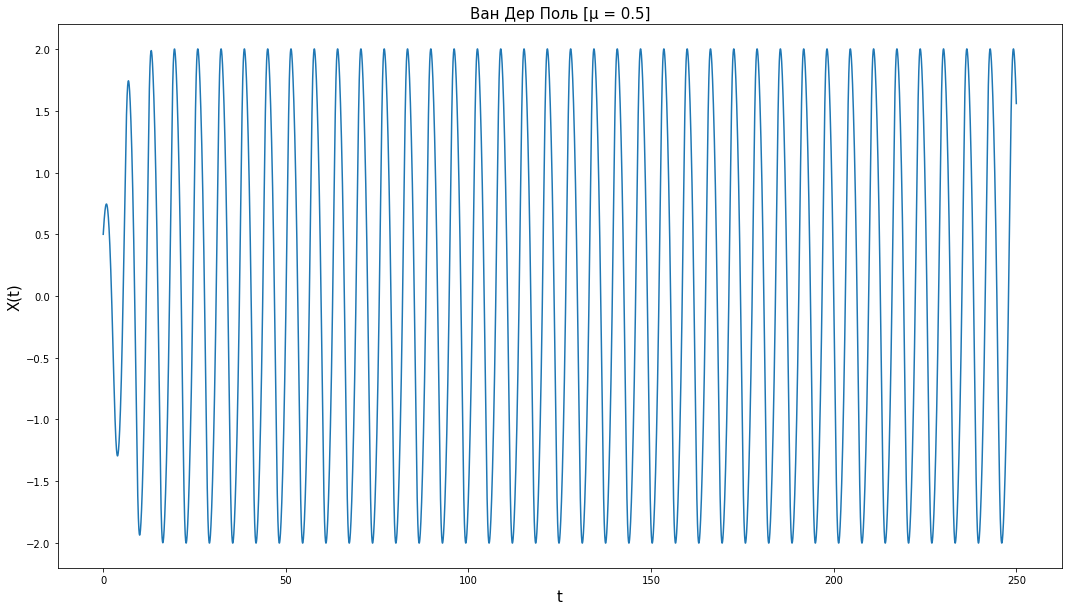

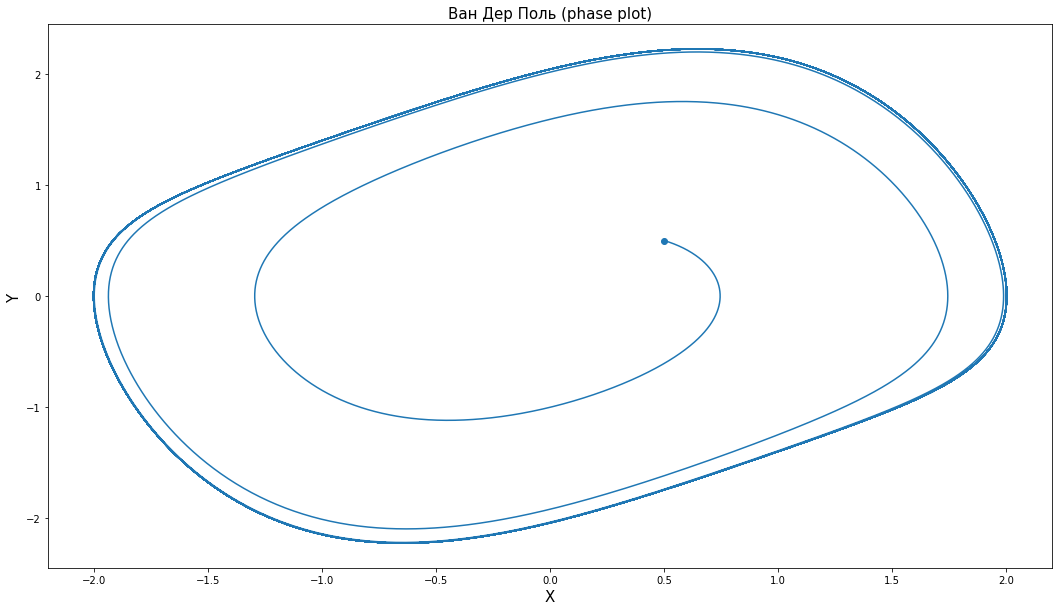

In [18]:
wonder.build( (0.5, 0), (0.5,0.5), np.linspace(0, 250, 50000))
wonder.plot('Ван Дер Поль','[\u03BC = 0.5]')
wonder.phase_plot('Ван Дер Поль')

### Display values

In [19]:
#pd.set_option('display.max_rows', 999)
#For displaying X(t) and Y(t)
#pd.merge(wonder.get_data(0), wonder.get_data(1), on = 't')

<Figure size 432x288 with 0 Axes>

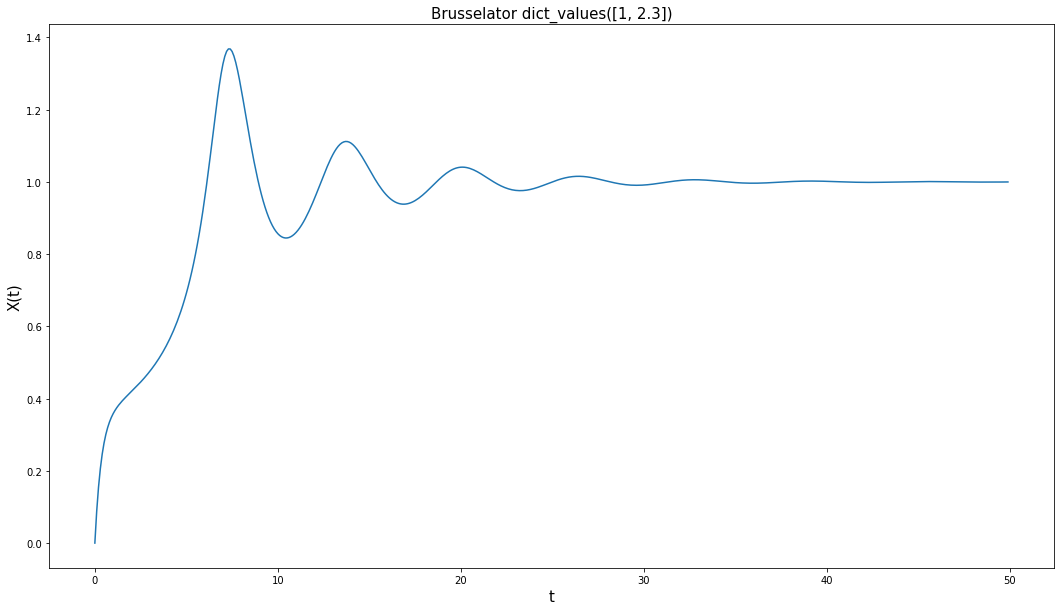

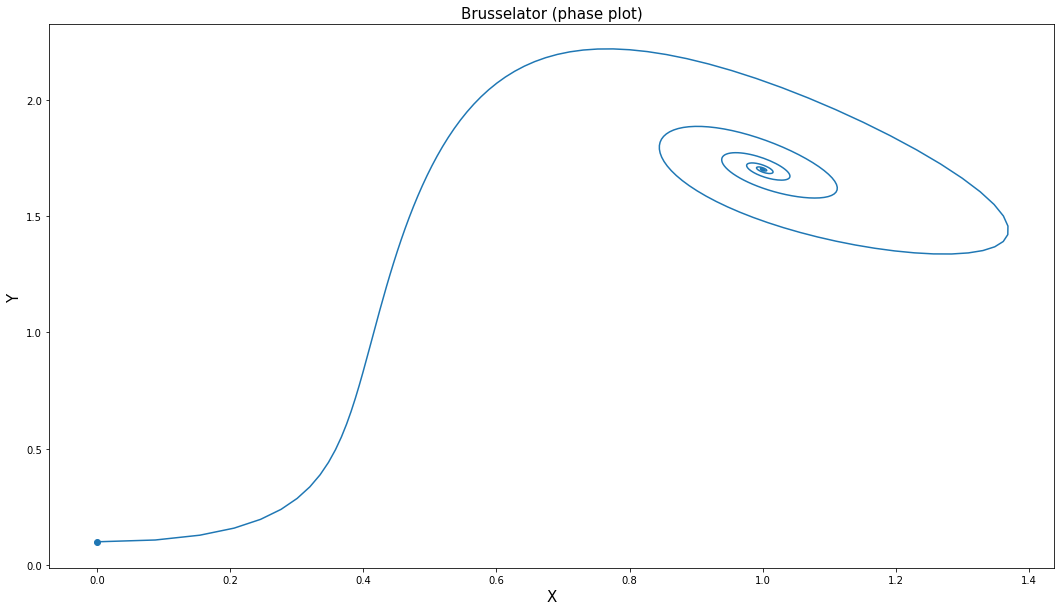

In [20]:
def brussellator(z, t, a, b):
    dx_dt = a + z[1] * z[0]**2 - b * z[0] - z[0]
    dy_dt = b * z[0] - z[1] * z[0]**2
    return dx_dt, dy_dt
brussel = Model(brussellator)
brussel_params = {
    'a': 1, 
    'b': 2.3
}
brussel_initial_condition=(0, 0.1)
brussel_time_points=np.arange(0, 50, 0.1)
brussel.build((1, 1.7), brussel_initial_condition, brussel_time_points)
brussel.plot('Brusselator', str(brussel_params.values()))
brussel.phase_plot('Brusselator')

<Figure size 432x288 with 0 Axes>

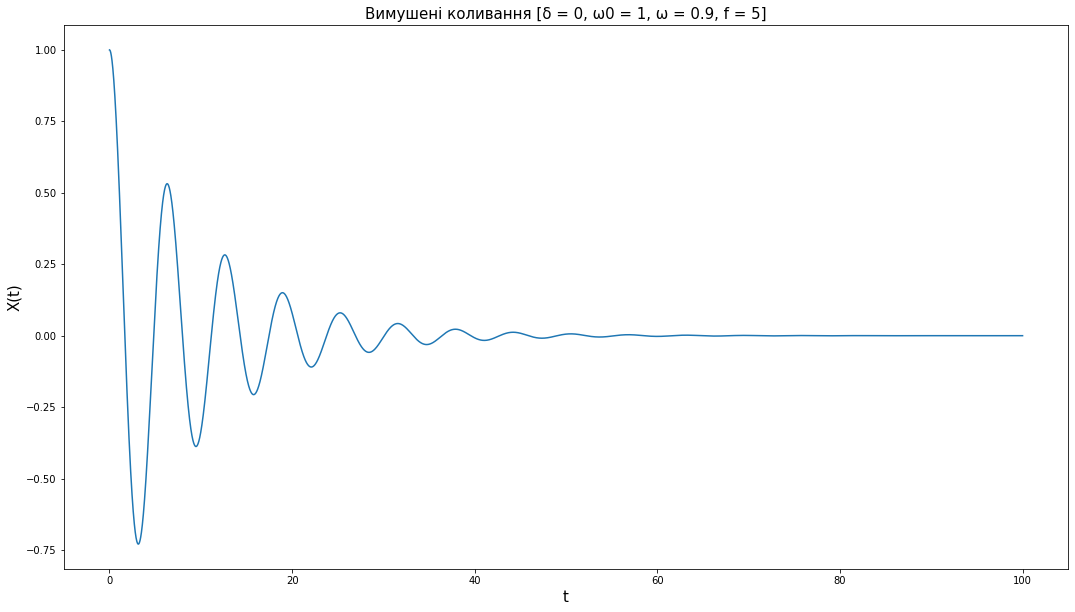

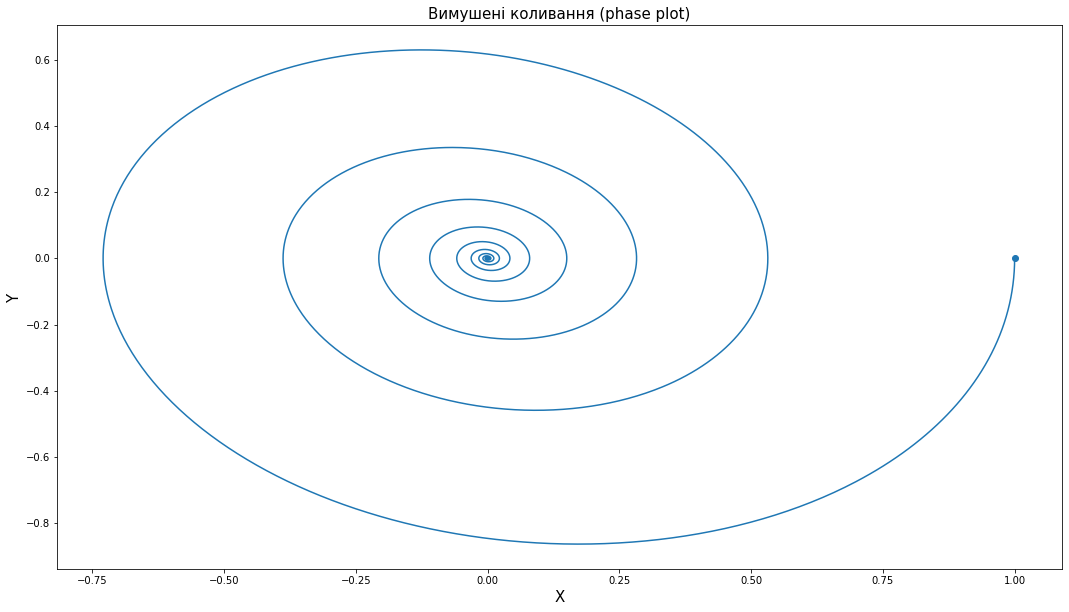

In [21]:
def oscilation(z, t, delta, omega_0, omega, f):
    dx_dt = z[1]
    dy_dt = 2 * delta * z[1] - omega_0 ** 2 * z[0] - f * np.cos(omega * t)  
    return dx_dt, dy_dt

oscilate = Model(oscilation)
oscilate.build((-0.1, 1, 0, 0), (1,0), np.linspace(0, 100, 10000))
oscilate.plot('Вимушені коливання', '[\u03B4 = 0, \u03C90 = 1, \u03C9 = 0.9, f = 5]')
oscilate.phase_plot('Вимушені коливання')

# LAB 2

In [22]:
def Verhulst(z, t, r, k):
    dx_dt = r * z[0] * (k - z[0])
    dy_dt = 0 
    return dx_dt, dy_dt

verhulst = Model(Verhulst)

verhulst.build( (0.1, 100), (0.1,0), np.linspace(0, 0, 1000))

y = verhulst.get_values(50)
funcs = [lambda x: x, lambda x: x ** 2]
settings = (0, 10, 1)
orders = [1, 1, 1]
data = form_discrete_values(settings, funcs, y, orders)

TypeError: form_discrete_values() missing 1 required positional argument: 'h'

In [23]:
delta = 0.1
omega = 0.5
settings = (0, 10, 1)
oscilate = Model(oscilation)
start = 0
end = 400
iters = 40000
step = 100
oscilate.build((-delta, omega, 0, 0), (1,0), np.linspace(start, end, iters))
y = oscilate.get_values(step)
h = (end - start)*step/iters
print(h)
print(omega)
orders = [3, 2, 1]
teta_1 = (omega ** 2 - 2 + 2 * delta) / (2 * delta - 1)
funcs = [lambda x: x, lambda x: x, lambda x: x]
data = form_discrete_values(settings, funcs, y, orders, h)
params = oscilate.get_params(data)
delta = (1. / (2*h) ) * ((params[0]) + 1)
omega = ((params[1] * (2 * h * delta - 1) + (2 - 2 * h * delta)) ** 0.5) * (1. / h)
#print(delta)
#print(np.sqrt(params[0] * (2 * delta - 1) + 2 - 2 * delta))
omega
delta

1.0
0.5
(1, 1)
(1, 2)


ValueError: cannot reshape array of size 2 into shape (1,1)

In [24]:
params = verhulst.get_params(data)
print(-params[1])
print((1-params[0])/params[1])

(1, 1)
(1, 2)


ValueError: cannot reshape array of size 2 into shape (1,1)

In [25]:
params = np.linalg.lstsq(data[:, :-1], data[:, -1], rcond=1)[0]
print((1. / (2*h) ) * ((params[0]) + 1))
print(-params[1])
print((1-params[0])/params[1])

0.5621981143331238
1.0613435675920322
-0.8249955980986584


In [27]:
X = np.array([[np.random.uniform(0, 1) for j in range(2)] for i in range(100)])
Y = np.array([[np.random.uniform(0, 1)] for i in range(100)])
np.linalg.lstsq(X, Y, rcond=1)[0]


array([[0.45801818],
       [0.34442607]])

In [31]:
params = oscilate.get_params(np.hstack((X, Y)))
params

(1,)


array([[0.50201204],
       [0.30616645]])

In [36]:
a = params[:-1]

In [37]:
a.reshape(-1)

array([ 0.12439623, -1.06134357])

In [33]:
a

array([ 0.12439623, -1.06134357])